In [17]:
import pandas as pd

# Attempt to read the CSV file with ';' as delimiter
try:
    # Read the CSV file while handling potential parsing errors
    df_X_train = pd.read_csv('final_df.csv', delimiter=';', on_bad_lines='skip', engine='python')
    
    # Display the first few rows to verify
    print("DataFrame successfully created:")
    print(df_X_train.head())

except Exception as e:
    print(f"An error occurred: {e}")


DataFrame successfully created:
  neighbourhood_cleansed,property_type,accommodates,room_type,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,

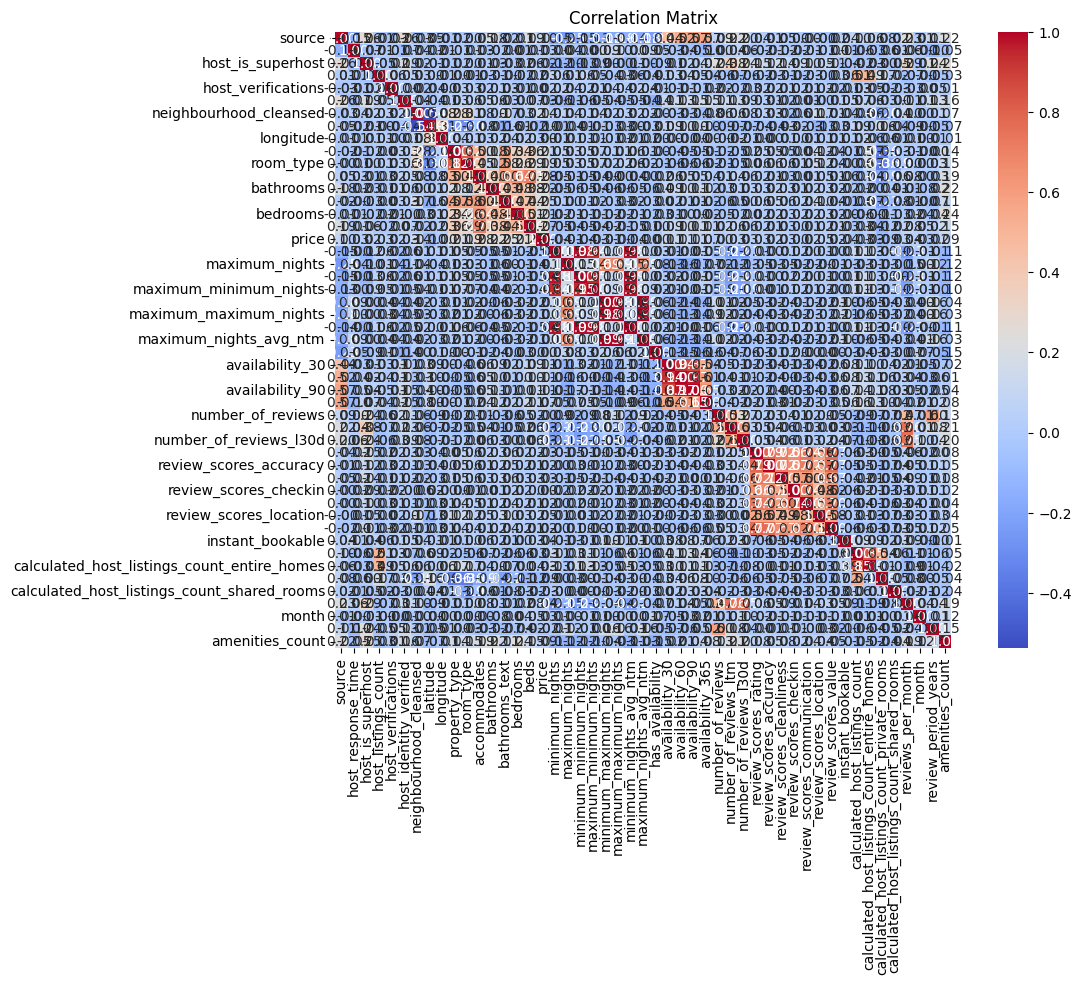

In [18]:
# a. Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_X_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

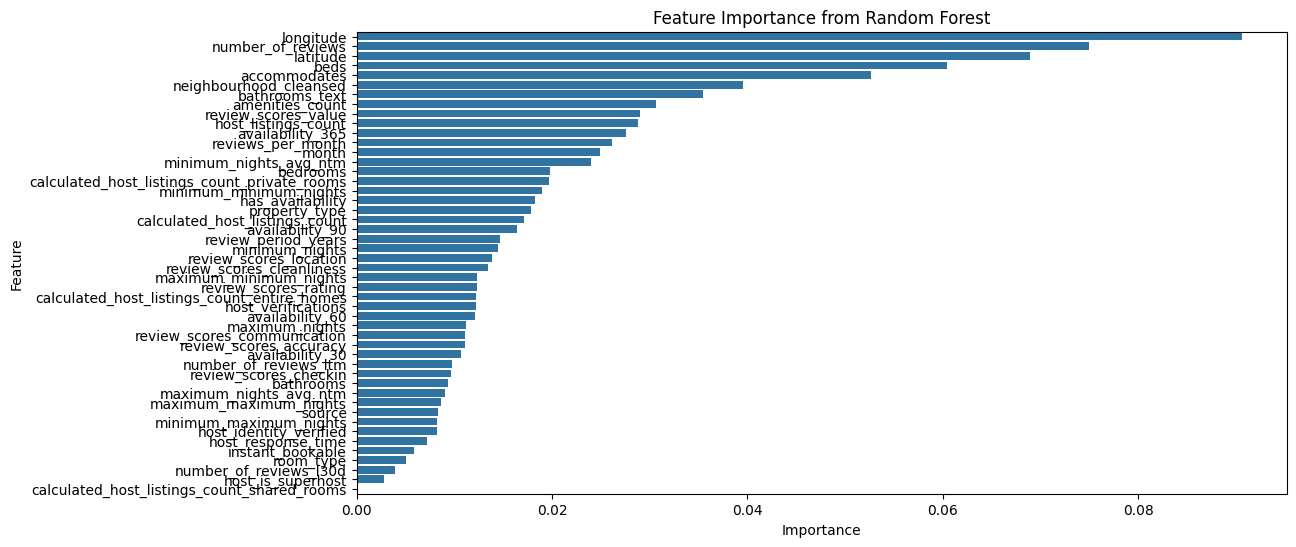

In [20]:
# b. Feature Importance using Random Forest

from sklearn.ensemble import RandomForestRegressor

# Define the target and features
X = df_X_train.drop(columns=['price'])  # Assuming 'Price' is the target variable
y = df_X_train['price']

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.show()


In [45]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Use Random Forest for feature importance
model = RandomForestRegressor(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Choose top 5 features
rfe.fit(X, y)

# Display selected features
selected_features_rfe = [features[i] for i in range(len(features)) if rfe.support_[i]]
print("Selected features by RFE:", selected_features_rfe)


KeyboardInterrupt: 

In [ ]:
features = longiude, number_of_reviews, Latitude, beds, accommodates,neighbourhood_cleansed,bathrrom_text,amenities_count,review_score_value,bedrooms,room_type, property_type, 

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into df_X_train

# Define the target and features
X = df_X_train.drop(columns=['price'])  
y = df_X_train['price']

# Random Forest Feature Importance
rf_model = RandomForestRegressor()
rf_model.fit(X, y)
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# RFE for feature selection
n_features_to_select = min(10, X.shape[1])  # Ensure you don't select more features than available
rfe = RFE(LinearRegression(), n_features_to_select)
fit = rfe.fit(X, y)

# Get selected features
selected_features = X.columns[fit.support_]
print("Selected features by RFE:", selected_features.tolist())

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.show()


TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [25]:
# Class Separability / Target Predictability

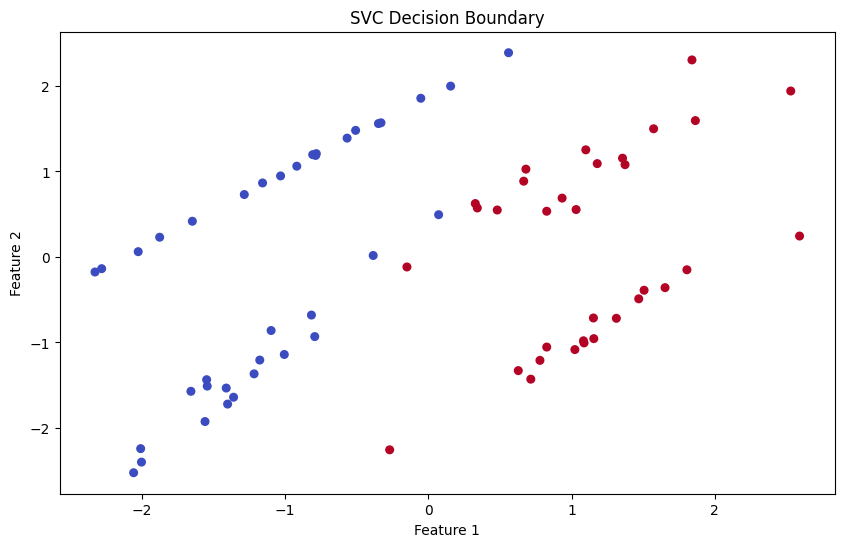

In [42]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Specify parameters to avoid ValueError
n_samples = 100
n_features = 5  # Total number of features
n_informative = 2  # Informative features
n_redundant = 1  # Redundant features
n_repeated = 1  # Repeated features
n_classes = 2

# Create a sample classification problem
X_sample, y_sample = make_classification(n_samples=n_samples, 
                                         n_features=n_features, 
                                         n_informative=n_informative, 
                                         n_redundant=n_redundant, 
                                         n_repeated=n_repeated, 
                                         n_classes=n_classes, 
                                         random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Train a SVC model
model = SVC()
model.fit(X_train, y_train)

# Optional: Visualize decision boundaries (2D only for simplicity)
plt.figure(figsize=(10, 6))
# Reduce dimensions for visualization if more than 2 features
if n_features >= 2:
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap='coolwarm')
    plt.title('SVC Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
